In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import train_test_split


# Load CSV in DF

In [30]:
df = pd.read_csv('/home/dmin/code/loic06/Forecasting-Gold-Price/raw_data/Extract_TimeFrame_60_clean.csv',sep=';')

In [31]:
df.head()

,time,open,high,low,close,Basis,Upper,Lower,Up Trend,Down Trend,KAMA,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction,Unnamed: 16
0,1/11/22 0:00,1801.23,1802.85,1800.03,1801.18,1796.565,1802.85,1790.28,1790.975815,NaN,1795.256156,65.669045,0.831694,0.803134,2.519134,0.332677,NaN
1,1/11/22 1:00,1801.16,1804.61,1801.15,1802.70,1797.445,1804.61,1790.28,1792.424234,NaN,1795.536505,69.806836,0.888896,0.826182,2.519134,0.332677,NaN
2,1/11/22 2:00,1802.68,1805.91,1802.00,1804.85,1798.095,1805.91,1790.28,1793.371810,NaN,1795.896520,74.665739,0.963492,0.876434,2.519134,0.332677,NaN
3,1/11/22 3:00,1804.83,1806.31,1804.21,1805.18,1798.295,1806.31,1790.28,1795.105129,NaN,1796.250762,75.350694,0.925586,0.917716,2.519134,0.332677,NaN
4,1/11/22 4:00,1805.18,1807.73,1804.99,1805.91,1799.005,1807.73,1790.28,1796.398616,NaN,1796.635508,76.904655,0.915073,0.952947,2.519134,0.332677,NaN


# Copy pour éviter de tout casser

In [32]:
data = df.copy()
data.head()

,time,open,high,low,close,Basis,Upper,Lower,Up Trend,Down Trend,KAMA,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction,Unnamed: 16
0,1/11/22 0:00,1801.23,1802.85,1800.03,1801.18,1796.565,1802.85,1790.28,1790.975815,NaN,1795.256156,65.669045,0.831694,0.803134,2.519134,0.332677,NaN
1,1/11/22 1:00,1801.16,1804.61,1801.15,1802.70,1797.445,1804.61,1790.28,1792.424234,NaN,1795.536505,69.806836,0.888896,0.826182,2.519134,0.332677,NaN
2,1/11/22 2:00,1802.68,1805.91,1802.00,1804.85,1798.095,1805.91,1790.28,1793.371810,NaN,1795.896520,74.665739,0.963492,0.876434,2.519134,0.332677,NaN
3,1/11/22 3:00,1804.83,1806.31,1804.21,1805.18,1798.295,1806.31,1790.28,1795.105129,NaN,1796.250762,75.350694,0.925586,0.917716,2.519134,0.332677,NaN
4,1/11/22 4:00,1805.18,1807.73,1804.99,1805.91,1799.005,1807.73,1790.28,1796.398616,NaN,1796.635508,76.904655,0.915073,0.952947,2.519134,0.332677,NaN


# Pas de Null detecté

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23112 entries, 0 to 23111
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 23112 non-null  object 
 1   open                 23112 non-null  float64
 2   high                 23112 non-null  float64
 3   low                  23112 non-null  float64
 4   close                23112 non-null  float64
 5   Basis                23112 non-null  float64
 6   Upper                23112 non-null  float64
 7   Lower                23112 non-null  float64
 8   Up Trend             12053 non-null  float64
 9   Down Trend           11059 non-null  float64
 10  KAMA                 23112 non-null  float64
 11  RSI                  23112 non-null  float64
 12  Bollinger Bands %b   23112 non-null  float64
 13  Bollinger BandWidth  23112 non-null  float64
 14  Highest Expansion    23112 non-null  float64
 15  Lowest Contraction   23112 non-null 

# Par simplicité, on enlève ces 3 features

In [34]:
data = data.drop(columns=['Up Trend','Down Trend','Unnamed: 16'])
data.head()

,time,open,high,low,close,Basis,Upper,Lower,KAMA,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction
0,1/11/22 0:00,1801.23,1802.85,1800.03,1801.18,1796.565,1802.85,1790.28,1795.256156,65.669045,0.831694,0.803134,2.519134,0.332677
1,1/11/22 1:00,1801.16,1804.61,1801.15,1802.70,1797.445,1804.61,1790.28,1795.536505,69.806836,0.888896,0.826182,2.519134,0.332677
2,1/11/22 2:00,1802.68,1805.91,1802.00,1804.85,1798.095,1805.91,1790.28,1795.896520,74.665739,0.963492,0.876434,2.519134,0.332677
3,1/11/22 3:00,1804.83,1806.31,1804.21,1805.18,1798.295,1806.31,1790.28,1796.250762,75.350694,0.925586,0.917716,2.519134,0.332677
4,1/11/22 4:00,1805.18,1807.73,1804.99,1805.91,1799.005,1807.73,1790.28,1796.635508,76.904655,0.915073,0.952947,2.519134,0.332677


# Pas de NaN detecté

In [35]:
data.isna().sum()

time                   0
open                   0
high                   0
low                    0
close                  0
Basis                  0
Upper                  0
Lower                  0
KAMA                   0
RSI                    0
Bollinger Bands %b     0
Bollinger BandWidth    0
Highest Expansion      0
Lowest Contraction     0
dtype: int64

# Etude de la corrélation entre features

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23112 entries, 0 to 23111
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 23112 non-null  object 
 1   open                 23112 non-null  float64
 2   high                 23112 non-null  float64
 3   low                  23112 non-null  float64
 4   close                23112 non-null  float64
 5   Basis                23112 non-null  float64
 6   Upper                23112 non-null  float64
 7   Lower                23112 non-null  float64
 8   KAMA                 23112 non-null  float64
 9   RSI                  23112 non-null  float64
 10  Bollinger Bands %b   23112 non-null  float64
 11  Bollinger BandWidth  23112 non-null  float64
 12  Highest Expansion    23112 non-null  float64
 13  Lowest Contraction   23112 non-null  float64
dtypes: float64(13), object(1)
memory usage: 2.5+ MB


# Conversion en datetime

In [37]:
data['time'] = pd.to_datetime(data['time'], format="%m/%d/%y %H:%M")

In [38]:
data = data.sort_values('time').reset_index(drop=True)

In [39]:
data.head(5)

,time,open,high,low,close,Basis,Upper,Lower,KAMA,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction
0,2022-01-11 00:00:00,1801.23,1802.85,1800.03,1801.18,1796.565,1802.85,1790.28,1795.256156,65.669045,0.831694,0.803134,2.519134,0.332677
1,2022-01-11 01:00:00,1801.16,1804.61,1801.15,1802.70,1797.445,1804.61,1790.28,1795.536505,69.806836,0.888896,0.826182,2.519134,0.332677
2,2022-01-11 02:00:00,1802.68,1805.91,1802.00,1804.85,1798.095,1805.91,1790.28,1795.896520,74.665739,0.963492,0.876434,2.519134,0.332677
3,2022-01-11 03:00:00,1804.83,1806.31,1804.21,1805.18,1798.295,1806.31,1790.28,1796.250762,75.350694,0.925586,0.917716,2.519134,0.332677
4,2022-01-11 04:00:00,1805.18,1807.73,1804.99,1805.91,1799.005,1807.73,1790.28,1796.635508,76.904655,0.915073,0.952947,2.519134,0.332677


In [40]:
data.dtypes

time                   datetime64[ns]
open                          float64
high                          float64
low                           float64
close                         float64
Basis                         float64
Upper                         float64
Lower                         float64
KAMA                          float64
RSI                           float64
Bollinger Bands %b            float64
Bollinger BandWidth           float64
Highest Expansion             float64
Lowest Contraction            float64
dtype: object

<Axes: >

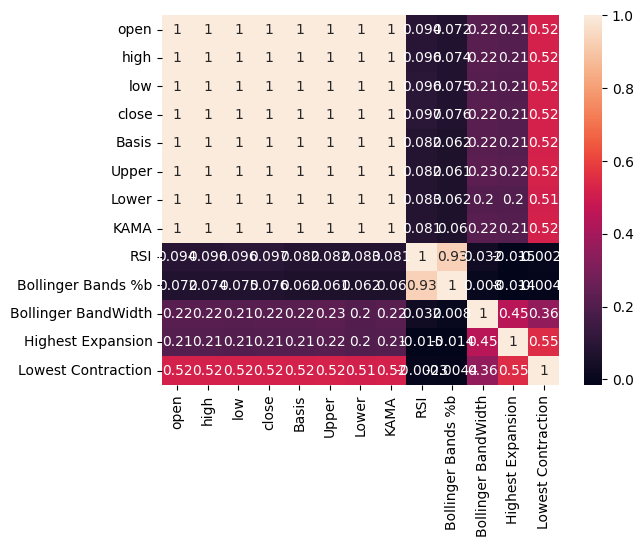

In [41]:
correlation_matrix = data.select_dtypes('float').corr()
sns.heatmap(correlation_matrix,annot=True)

# On vire toutes les features extremement corrélées à notre target 'close'

In [42]:
data = data.drop(columns=['open','high','low','Basis','Upper','Lower','KAMA'])

<Axes: >

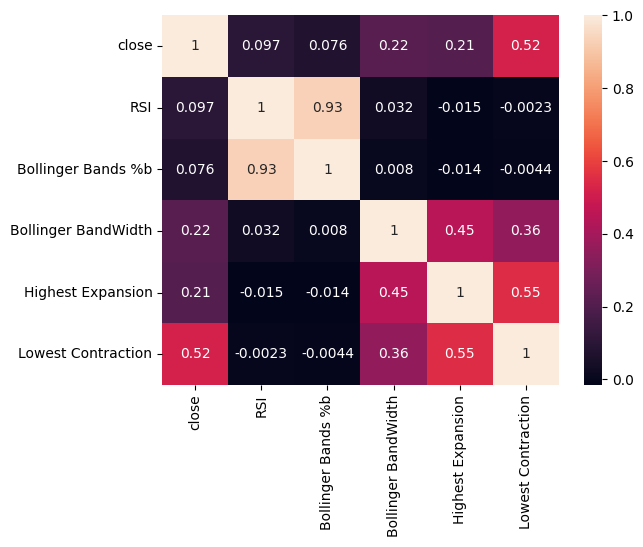

In [43]:
correlation_matrix = data.select_dtypes('float').corr()
sns.heatmap(correlation_matrix,annot=True)

# On définit la cible alignée à t:

In [44]:
# cible = close à l’instant suivant
data['target_close_t'] = data['close'].shift(-1)

In [45]:
data.head(5)

,time,close,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction,target_close_t
0,2022-01-11 00:00:00,1801.18,65.669045,0.831694,0.803134,2.519134,0.332677,1802.70
1,2022-01-11 01:00:00,1802.70,69.806836,0.888896,0.826182,2.519134,0.332677,1804.85
2,2022-01-11 02:00:00,1804.85,74.665739,0.963492,0.876434,2.519134,0.332677,1805.18
3,2022-01-11 03:00:00,1805.18,75.350694,0.925586,0.917716,2.519134,0.332677,1805.91
4,2022-01-11 04:00:00,1805.91,76.904655,0.915073,0.952947,2.519134,0.332677,1806.72


# On construit les features lags t-1

In [46]:
'''feature_cols = [
    'close','RSI','Bollinger Bands %b',
    'Bollinger BandWidth','Highest Expansion','Lowest Contraction'
]

for c in feature_cols:
    data[f'{c}_lag1'] = data[c].shift(1)'''

"feature_cols = [\n    'close','RSI','Bollinger Bands %b',\n    'Bollinger BandWidth','Highest Expansion','Lowest Contraction'\n]\n\nfor c in feature_cols:\n    data[f'{c}_lag1'] = data[c].shift(1)"

In [47]:
#data.head(5)

# Nettoyage des NaN et filtrage horizon

## Le premier point perd ses lags, le dernier perd la cible ==> il faut les traiter

In [48]:
'''lag_cols = [f'{c}_lag1' for c in feature_cols]
X = data[lag_cols].copy()
y = data['target_close_t'].copy()

valid_idx = X.notna().all(axis=1) & y.notna()
X = X[valid_idx]
y = y[valid_idx]'''

"lag_cols = [f'{c}_lag1' for c in feature_cols]\nX = data[lag_cols].copy()\ny = data['target_close_t'].copy()\n\nvalid_idx = X.notna().all(axis=1) & y.notna()\nX = X[valid_idx]\ny = y[valid_idx]"

In [59]:
data = data.dropna()
data

,time,close,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction,target_close_t
0,2022-01-11 00:00:00,1801.18,65.669045,0.831694,0.803134,2.519134,0.332677,1802.70
1,2022-01-11 01:00:00,1802.70,69.806836,0.888896,0.826182,2.519134,0.332677,1804.85
2,2022-01-11 02:00:00,1804.85,74.665739,0.963492,0.876434,2.519134,0.332677,1805.18
3,2022-01-11 03:00:00,1805.18,75.350694,0.925586,0.917716,2.519134,0.332677,1805.91
4,2022-01-11 04:00:00,1805.91,76.904655,0.915073,0.952947,2.519134,0.332677,1806.72
...,...,...,...,...,...,...,...,...
23106,2025-12-09 04:00:00,4194.60,48.611910,0.428196,0.816777,1.597454,0.502537,4186.93
23107,2025-12-09 05:00:00,4186.93,40.948451,0.232289,0.812984,1.597454,0.502537,4179.83
23108,2025-12-09 06:00:00,4179.83,35.173900,0.072570,0.821917,1.597454,0.502537,4182.07
23109,2025-12-09 07:00:00,4182.07,38.263925,0.168487,0.805397,1.597454,0.502537,4182.43


In [60]:
X = data.drop(columns=['time','target_close_t'])
y= data[['target_close_t']]

In [61]:
y.isna().sum()

target_close_t    0
dtype: int64

# Split time based (sans shuffle)

In [52]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

# Define XGBoost Model

# Definition des hyperparametres (pas de possibilité de mettre un early stopping avec la derniere version de XGBoost)

In [53]:
'''params = dict(
    n_estimators=300,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,    # L1
    reg_lambda=1.0,   # L2
    gamma=0.0,
    random_state=42,
    n_jobs=-1,
    tree_method="hist",# rapide
    eval_metric="rmse"
)'''

'params = dict(\n    n_estimators=300,\n    learning_rate=0.03,\n    max_depth=6,\n    subsample=0.8,\n    colsample_bytree=0.8,\n    reg_alpha=0.0,    # L1\n    reg_lambda=1.0,   # L2\n    gamma=0.0,\n    random_state=42,\n    n_jobs=-1,\n    tree_method="hist",# rapide\n    eval_metric="rmse"\n)'

In [62]:
# Split data into train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42  # TEST = 30%
)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size = 0.5, random_state = 42  # TEST = 15%
)

# Cross Validation

In [64]:
#mae_scores, rmse_scores = [], []

'''for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]'''

model = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1, early_stopping_rounds=5)

# early_stopping_rounds est accepté dans fit()
model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train),(X_val, y_val)],
        verbose=True,
)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#mae_scores.append(mae); rmse_scores.append(rmse)

print(f"MAE={mae:.3f} | RMSE={rmse:.3f}")

'''print(f"CV | MAE={np.mean(mae_scores):.3f}±{np.std(mae_scores):.3f} | "
      f"RMSE={np.mean(rmse_scores):.3f}±{np.std(rmse_scores):.3f}")'''

[0]	validation_0-rmse:593.95353	validation_1-rmse:598.22442
[1]	validation_0-rmse:534.77798	validation_1-rmse:538.64495
[2]	validation_0-rmse:481.50682	validation_1-rmse:485.01175
[3]	validation_0-rmse:433.54742	validation_1-rmse:436.69341
[4]	validation_0-rmse:390.36479	validation_1-rmse:393.05203
[5]	validation_0-rmse:351.49506	validation_1-rmse:353.86924
[6]	validation_0-rmse:316.49104	validation_1-rmse:318.57177
[7]	validation_0-rmse:284.98386	validation_1-rmse:286.85557
[8]	validation_0-rmse:256.61994	validation_1-rmse:258.28944
[9]	validation_0-rmse:231.08469	validation_1-rmse:232.55100
[10]	validation_0-rmse:208.09645	validation_1-rmse:209.34784
[11]	validation_0-rmse:187.40460	validation_1-rmse:188.51567
[12]	validation_0-rmse:168.77555	validation_1-rmse:169.74268
[13]	validation_0-rmse:152.00531	validation_1-rmse:152.86939
[14]	validation_0-rmse:136.91218	validation_1-rmse:137.67125
[15]	validation_0-rmse:123.32630	validation_1-rmse:123.96863
[16]	validation_0-rmse:111.09647	v

'print(f"CV | MAE={np.mean(mae_scores):.3f}±{np.std(mae_scores):.3f} | "\n      f"RMSE={np.mean(rmse_scores):.3f}±{np.std(rmse_scores):.3f}")'